# Práctica 1: Parte A
### Itziar López Almagro y Adrian Carlos Skaczylo 



En esta parte la practica procedemos a analizar el dataset titanic.csv. Dicho dataseet contiene los siguientes atributos:
| **Variable**   | **Descripción**                                                                 | **Valores**                                  |
|----------------|---------------------------------------------------------------------------------|----------------------------------------------|
| **PassengerId** | Identificador único de cada pasajero.                                           | Numérico                                     |
| **Survived**    | Indica si el pasajero sobrevivió (1) o no (0).                                  | 0, 1                                         |
| **Pclass**      | Clase del billete del pasajero                                                  | 1 = Primera clase, 2 = Segunda clase, 3 = Tercera clase |
| **Name**        | Nombre completo del pasajero.                                                   | Texto               |
| **Sex**         | Género del pasajero                                                             | Male, Female                           |
| **Age**         | Edad del pasajero en años. Puede contener valores nulos.                        | Numérico(puede contener nulos)                          |
| **SibSp**       | Número de hermanos o cónyuges que viajaban con el pasajero.                     |  Numérico                            |
| **Parch**       | Número de padres o hijos que viajaban con el pasajero.                          |  Numérico                                 |
| **Ticket**      | Código del billete del pasajero.                                                | Texto                 |
| **Fare**        | Tarifa pagada por el billete.                                                   | Numérico                      |
| **Cabin**       | Número de la cabina en la que se alojó el pasajero                              | Texto (puede contener nulos)                   |
| **Embarked**    | Puerto en el que el pasajero abordó el Titanic                                  | "C" = Cherburgo, "Q" = Queenstown, "S" = Southampton |



In [ ]:
#Instalar en caso de ser necesario
!pip install pandas 
!pip install numpy
!pip install scipy
!pip install seaborn
!pip install scikit-learn


In [112]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [2]:
#Creamos el dataframe a partir del datasheet
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Una vez tenemeos el dataframe es importante "quitar ruido". Para ello vamos a eliminar aquellas instancias repetidas y que tengan algun valor **nulo**

In [3]:
#Eliminar datos con valores nulos
df_sin_nulos = df.dropna()
num_inst_eliminadas = len(df)-len(df_sin_nulos)
df = df_sin_nulos

#Eliminar duplicados
num_duplicados = df.duplicated().sum()
df = df.drop_duplicates()
df=df.reset_index(drop=True) #reajustamos la indexacion de las filas
df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
2,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
3,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
4,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
178,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
179,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
180,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
181,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


Vemos que el numero de filas eliminadas  y duplicadas ha sido respectivamente:

In [4]:
num_inst_eliminadas,num_duplicados #708 y 0

(708, 0)

## ¿En que beneficia su eliminación ?

La eliminacion de instancias con valores nulos facilita el trabajo y análisis a posteriori de dichos datos

## ¿Atributos útiles?
Observamos que las variables **Name**, **Ticket**,**PassengerId** y **Cabin** no aportan información relevante a nivel global. En términos generales, estos atributos solo contienen información particular, sin contribuir al análisis general del conjunto de datos.Procedemos a quitarlas del dataframe:

In [5]:
df = df.drop(['PassengerId','Name','Ticket','Cabin'],axis=1) #Axis = 1 = columna
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,female,38.0,1,0,71.2833,C
1,1,1,female,35.0,1,0,53.1000,S
2,0,1,male,54.0,0,0,51.8625,S
3,1,3,female,4.0,1,1,16.7000,S
4,1,1,female,58.0,0,0,26.5500,S
...,...,...,...,...,...,...,...,...
178,1,1,female,47.0,1,1,52.5542,S
179,0,1,male,33.0,0,0,5.0000,S
180,1,1,female,56.0,0,1,83.1583,C
181,1,1,female,19.0,0,0,30.0000,S


## Diagramas de Dispersión y Coeficiente de Correlación

En este apartado vamos a realizar el estudio de la relacion entre pares de variables numéricas.Para ello vamos a calcular el coeficiente de correlacion entre dos variables X e Y. Dicho coeficiente toma valores entre $-1$ y $1$, donde valores muy cercamos a $1$ significa una relacion directamente proporcional, y valores muy proximos a $-1$ una relacion inversamente proporcional.


In [6]:
#Seleccionamos las variables numericas
variables_numericas = df.columns.difference(['Sex','Embarked']) 
variables_numericas
df_numerico = df.loc[:,variables_numericas]

#Calculamos coeficientes de correlacion
correlaciones = df_numerico.corr().transpose()
correlaciones

,Age,Fare,Parch,Pclass,SibSp,Survived
Age,1.000000,-0.092424,-0.271271,-0.306514,-0.156162,-0.254085
Fare,-0.092424,1.000000,0.389740,-0.315235,0.286433,0.134241
Parch,-0.271271,0.389740,1.000000,0.047496,0.255346,0.023582
Pclass,-0.306514,-0.315235,0.047496,1.000000,-0.103592,-0.034542
SibSp,-0.156162,0.286433,0.255346,-0.103592,1.000000,0.106346
Survived,-0.254085,0.134241,0.023582,-0.034542,0.106346,1.000000


En esta tabla observamos directamente que no existe relación alguna entre las variables númericas pues ningun coeficiente toma valores cercanos a $1$ o $-1$. (Obviamente la diagonal no se tiene en cuenta)

Además podemos verlo de manera mas visual dibujando los diagramas de dispersión.Para ello vamos a dibujar la matriz de diagramas de dispersion 

<function matplotlib.pyplot.show(close=None, block=None)>

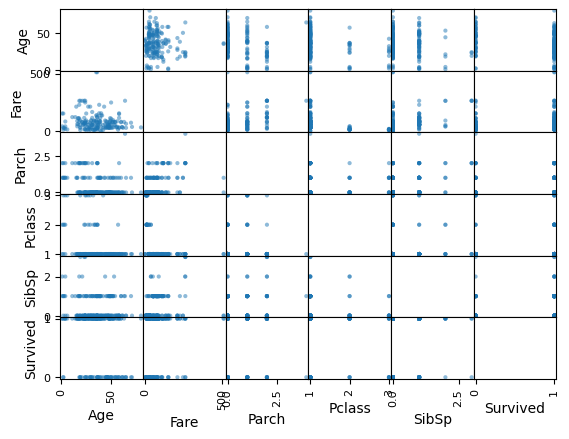

In [8]:
pd.plotting.scatter_matrix(df_numerico,diagonal='off')
plt.show


Ninguno de los diagramas sigue un "patrón", por lo que no estan relacionadas

### Estadísticas


In [9]:
estadisticas = df.describe().transpose()
estadisticas

,count,mean,std,min,25%,50%,75%,max
Survived,183.0,0.672131,0.470725,0.00,0.0,1.0,1.0,1.0000
Pclass,183.0,1.191257,0.515187,1.00,1.0,1.0,1.0,3.0000
Age,183.0,35.674426,15.643866,0.92,24.0,36.0,47.5,80.0000
SibSp,183.0,0.464481,0.644159,0.00,0.0,0.0,1.0,3.0000
Parch,183.0,0.475410,0.754617,0.00,0.0,0.0,1.0,4.0000
Fare,183.0,78.682469,76.347843,0.00,29.7,57.0,90.0,512.3292


- Survived

Al ser Survived una variable binaria la mejor manera de interpretar los datos es mediante un histograma:

<Axes: >

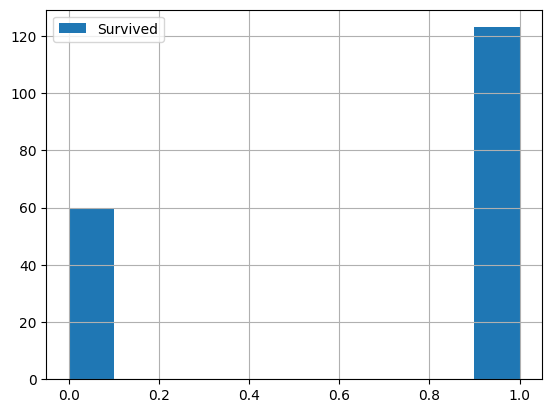

In [10]:
df['Survived'].hist(legend = True)


<Axes: ylabel='count'>

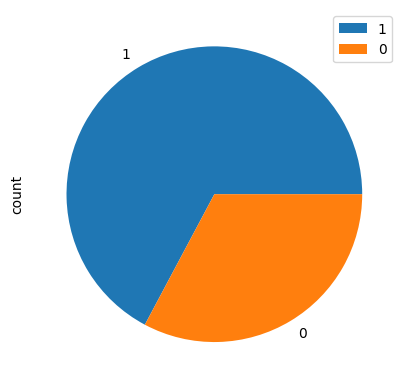

In [11]:
df['Survived'].value_counts().plot.pie(legend = True)

In [12]:
survived_counts = df['Survived'].value_counts()
survived_counts

Survived
1    123
0     60
Name: count, dtype: int64

In [13]:
survived_counts = df['Survived'].value_counts()
no_supervivientes = survived_counts[0]
supervivientes = survived_counts[1]

print('Número de supervivientes: ' + str(supervivientes))
print('Número de NO supervivientes: ' + str(no_supervivientes))
print('Porcentaje de supervivientes:'+str(df['Survived'].mean()))



Número de supervivientes: 123
Número de NO supervivientes: 60
Porcentaje de supervivientes:0.6721311475409836


Vemos que mas de la mitad de las personas, un 67%, sobrevivió.

- Pclass

Pclass representa la clase del pasajero donde 1 = Primera clase, 2 = Segunda clase, 3 = Tercera clase.

In [14]:
df['Pclass'].describe()

count    183.000000
mean       1.191257
std        0.515187
min        1.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        3.000000
Name: Pclass, dtype: float64

<Axes: >

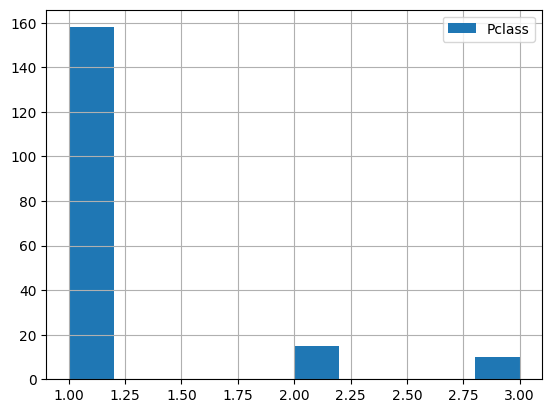

In [15]:
df['Pclass'].hist(legend = True)

Aquí se observa claramente que casi todos eran pasajeros de primera clase. Por eso la desviacion tipica ($std = 0.51$) es tan pequeña, por que practicamente todos son de primera clase

- Fare

Fare representa la tarifa pagada

In [16]:
df['Fare'].describe()

count    183.000000
mean      78.682469
std       76.347843
min        0.000000
25%       29.700000
50%       57.000000
75%       90.000000
max      512.329200
Name: Fare, dtype: float64

El rango de valores es bastante amplio: $[0,513]$. Luego conviene representar los datos mediante una aproximacion de la funcion de densidad

<Axes: ylabel='Density'>

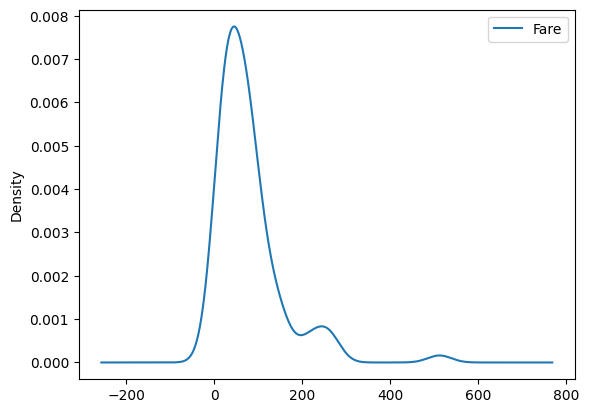

In [17]:
df['Fare'].plot(kind='density',legend=True)

Los precios mas frecuentes son aquellos pertenecientes a $[30,90]$ ( percentiles 25% y 75%). Además es curioso porque hay una pequeña cantidad de viajeros que viajó gratis:

In [18]:
df[df['Fare'] == 0]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
46,0,1,male,40.0,0,0,0.0,S
169,0,1,male,39.0,0,0,0.0,S


Y además en primera clase. Pero a la larga les salió un poco caro porque no sobrevieron 

- Age

In [19]:
df['Age'].describe()

count    183.000000
mean      35.674426
std       15.643866
min        0.920000
25%       24.000000
50%       36.000000
75%       47.500000
max       80.000000
Name: Age, dtype: float64

Como la variable Age no es categoríca, no es útil utilizar histogramas; sin embargo, podemos representar la función de densidad, la cual nos indicará visualmente como se distribuyen las distintas edades

<Axes: ylabel='Density'>

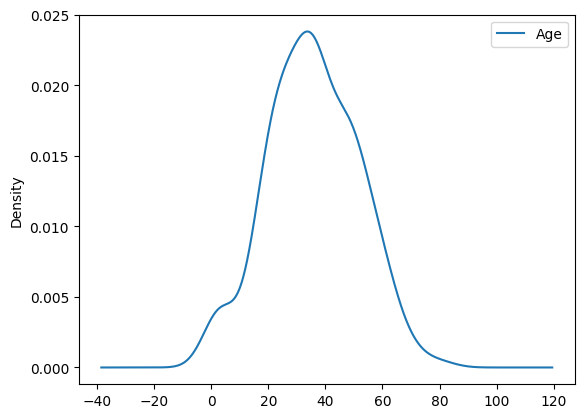

In [20]:
df['Age'].plot(kind='density',legend=True)

Vemos que las edades que menos se repiten son aquellas menores de $24$ y mayores de $47$ ( percentiles 25% y 75% ); mientras que las que mas predominan son edades entre $24$ y $47$, siendo la media de edad igual a $36$. Aun así el rango de edades es bastante disperso, pues por un lado tenemos que la persona mas joven no llega a tener ni un año ($min = 0.92$) y la persona  con mayor edad es de $80$ años

In [21]:
df[df['Age']>= 80]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
129,1,1,male,80.0,0,0,30.0,S


In [22]:
df[df['Age']<1]

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
55,1,1,male,0.92,1,2,151.55,S


In [23]:
df[['Age','Survived']].corr()

,Age,Survived
Age,1.000000,-0.254085
Survived,-0.254085,1.000000


Podría ser interesante ver la relacion de edades con la supervivencia:

<Axes: title={'center': 'Age'}, xlabel='Survived'>

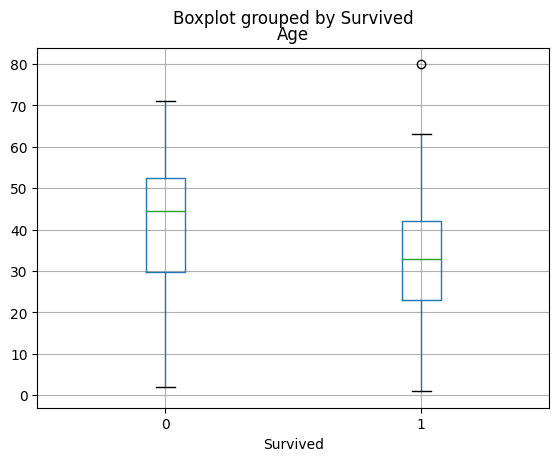

In [24]:
df[['Age','Survived']].boxplot(column='Age', by = 'Survived',grid=True)

Vemos que las persona que sobrevivieron, en general, son mas jovenes que las personas que no sobrevivieron

- SibSp

SibSp representa el numero de hermanos o conyugues que viajaban con el pasajero

In [25]:
df['SibSp'].describe()

count    183.000000
mean       0.464481
std        0.644159
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: SibSp, dtype: float64

En este caso, viendo que el rango de valores que toma es $[0,3]$ podemos representar los datos mediante un histograma

<Axes: ylabel='Frequency'>

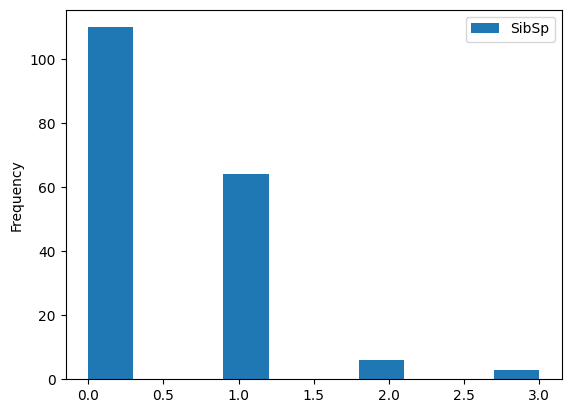

In [26]:
df['SibSp'].plot(kind='hist',legend=True)

In [27]:
df['SibSp'].value_counts()


SibSp
0    110
1     64
2      6
3      3
Name: count, dtype: int64

Lo que mas se repite son personas que viajaban sin hermanos o conyugues

- Parch

Parch representa el número de padres o hijos que viajaban con el pasajero.

In [28]:
df['Parch'].describe()

count    183.000000
mean       0.475410
std        0.754617
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        4.000000
Name: Parch, dtype: float64

El rango de valores no es muy grande ( $[0,4]$). Luego podemos emplear un histograma:

<Axes: ylabel='Frequency'>

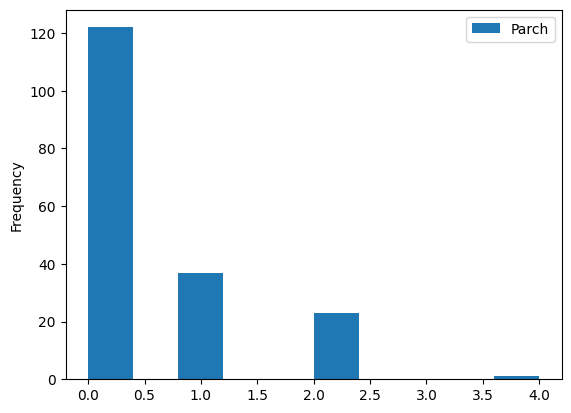

In [29]:
df['Parch'].plot(kind='hist',legend=True)

In [30]:
df['Parch'].value_counts()

Parch
0    122
1     37
2     23
4      1
Name: count, dtype: int64

Con estos datos, sumados a los datos de la variable SibSp, se aprecia que la tendencia de los pasajeros era viajar sin familiares cercanos.

### Variables Categóricas


Sin embargo, vemos que todavía hay variables categóricas: **Sex** y **Embarked**. 


- Sex

Al ser una variable categórica dibujamos el diagrama de barras

<Axes: xlabel='Sex'>

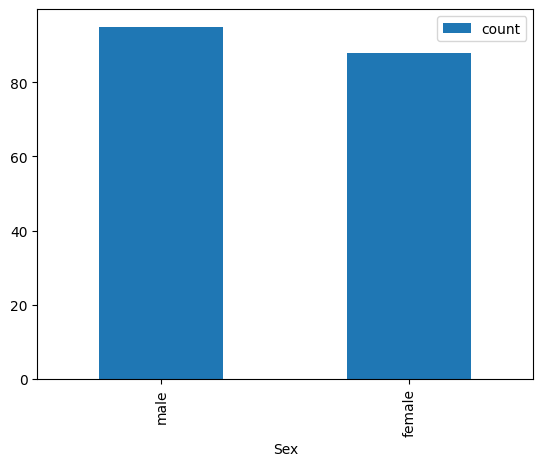

In [36]:
df['Sex'].value_counts().plot(kind='bar',legend=True)

<Axes: ylabel='count'>

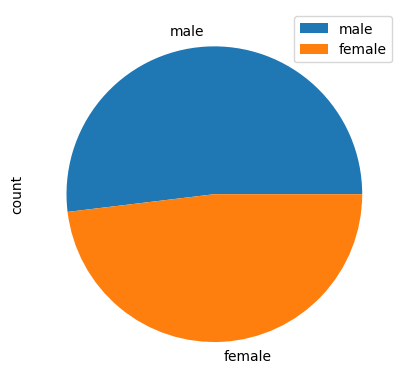

In [37]:
df['Sex'].value_counts().plot.pie(legend = True)

Vemos que este atributo esta bastante balanceado. Hay casi el mismo numero de hombres que de mujeres

- Embarked

Este atributo representa el lugar en el que embarcó el pasajero

<Axes: xlabel='Embarked'>

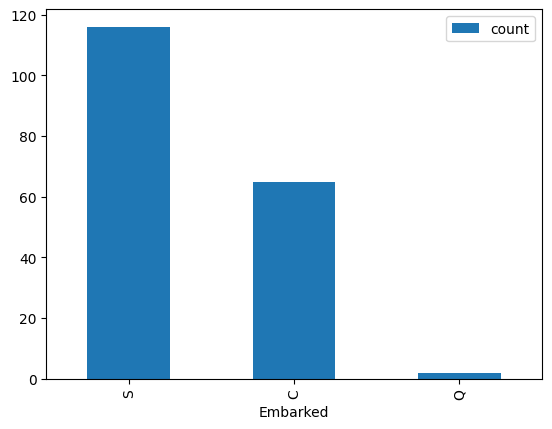

In [38]:
df['Embarked'].value_counts().plot(kind='bar',legend=True)

<Axes: ylabel='count'>

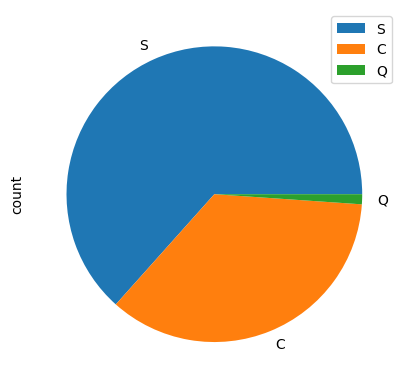

In [39]:
df['Embarked'].value_counts().plot.pie(legend = True)

Aqui observamos claramente que los datos no estan balanceados: muy poca gente embarcó en Queenstown.

### Outliers
Por definición, los outliers son valores atípicos en un conjunto de datos. Teniendo en cuenta las gráficas que hemos representado creemos que el único atributo que contien outliers es **Fare**.

Si representamos de nuevo la gráfica

<Axes: ylabel='Density'>

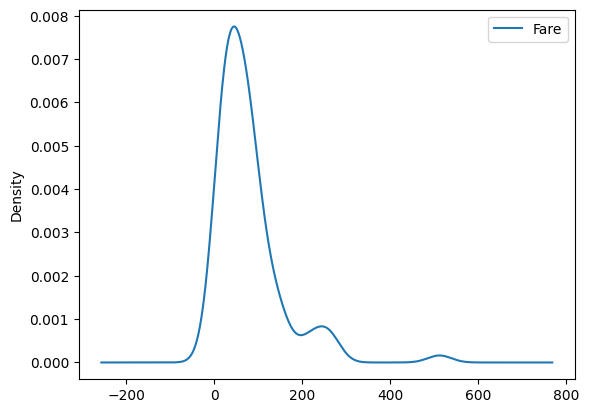

In [41]:
df['Fare'].plot(kind='density',legend=True)

Vemos en la distribucion de los valores que entre 400 y 600 hay un pequeño monticulo.

<BarContainer object of 2 artists>

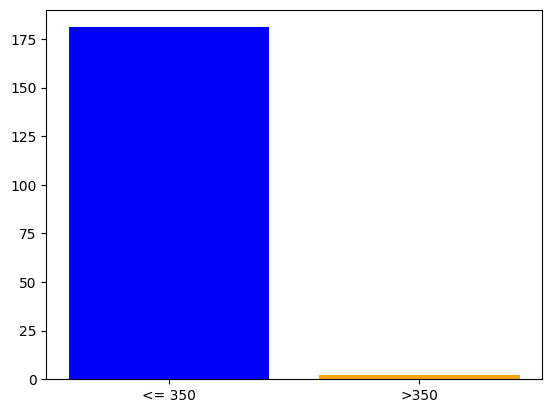

In [64]:
num_personas_menos350 = len(df[df['Fare'] <=350]['Fare'])
num_personas_mas350= len(df[df['Fare'] >350]['Fare'])
categorias =['<= 350','>350']
plt.bar(categorias,[num_personas_menos350,num_personas_mas350], color=['blue', 'orange'])

Y los outliers serían:

In [66]:
df[df['Fare'] >350]['Fare']

137    512.3292
153    512.3292
Name: Fare, dtype: float64

### Categóricos a Numéricos

- LabelEncoder

In [90]:
le_sex= LabelEncoder() #creamos un objeto labelencoder
le_embarked = LabelEncoder()

df_le = df.copy() #dataframe label encoder
df_le['Sex'] = le_sex.fit_transform(df['Sex'])
df_le['Embarked'] = le_embarked.fit_transform(df['Embarked'])

df_le

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,1,0,38.0,1,0,71.2833,0
1,1,1,0,35.0,1,0,53.1000,2
2,0,1,1,54.0,0,0,51.8625,2
3,1,3,0,4.0,1,1,16.7000,2
4,1,1,0,58.0,0,0,26.5500,2
...,...,...,...,...,...,...,...,...
178,1,1,0,47.0,1,1,52.5542,2
179,0,1,1,33.0,0,0,5.0000,2
180,1,1,0,56.0,0,1,83.1583,0
181,1,1,0,19.0,0,0,30.0000,2


In [91]:
print("Asignación de categorías para 'Sex':", dict(zip(le_sex.classes_, range(len(le_sex.classes_)))))
print("Asignación de categorías para 'Embarked':", dict(zip(le_embarked.classes_, range(len(le_embarked.classes_)))))


Asignación de categorías para 'Sex': {'female': 0, 'male': 1}
Asignación de categorías para 'Embarked': {'C': 0, 'Q': 1, 'S': 2}


- OneHotEncoder

In [106]:

ohe = OneHotEncoder(handle_unknown='ignore',sparse_output=False).set_output(transform='pandas')

df_ohe = df.copy()
ohe_sex = ohe.fit_transform(df[['Sex']])
ohe_embarked = ohe.fit_transform(df[['Embarked']])

df_ohe = pd.concat([df,ohe_sex,ohe_embarked],axis=1).drop(columns=['Sex','Embarked'])
df_ohe



,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,1,38.0,1,0,71.2833,1.0,0.0,1.0,0.0,0.0
1,1,1,35.0,1,0,53.1000,1.0,0.0,0.0,0.0,1.0
2,0,1,54.0,0,0,51.8625,0.0,1.0,0.0,0.0,1.0
3,1,3,4.0,1,1,16.7000,1.0,0.0,0.0,0.0,1.0
4,1,1,58.0,0,0,26.5500,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
178,1,1,47.0,1,1,52.5542,1.0,0.0,0.0,0.0,1.0
179,0,1,33.0,0,0,5.0000,0.0,1.0,0.0,0.0,1.0
180,1,1,56.0,0,1,83.1583,1.0,0.0,1.0,0.0,0.0
181,1,1,19.0,0,0,30.0000,1.0,0.0,0.0,0.0,1.0


La diferencia es clara: al hacer OneHotEncoder el numero de columnas aumenta considerablemente.

A priori, creemos que en este caso ambos métodos serían validos pues tampoco hay tantas variables. Sin embargo, onehotencoder elimina la posibilidad de que el modelo relacionenumeros grandes a mejores resultados, por lo que seguramente aplicariamos OneHotEncoder.

### Normalizar y Estandarizar

- Normalizar

Vamos a normalizar los datos usando la técnica de MinMax

In [ ]:
df_normalizado = df_ohe.copy()
minMaxScaler = MinMaxScaler()

# Normalizar todo el DataFrame
df_normalizado = pd.DataFrame(minMaxScaler.fit_transform(df_normalizado), columns=df_ohe.columns)

# Mostrar el DataFrame normalizado
df_normalizado



,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.0,0.468892,0.333333,0.00,0.139136,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.430956,0.333333,0.00,0.103644,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.671219,0.000000,0.00,0.101229,0.0,1.0,0.0,0.0,1.0
3,1.0,1.0,0.038948,0.333333,0.25,0.032596,1.0,0.0,0.0,0.0,1.0
4,1.0,0.0,0.721801,0.000000,0.00,0.051822,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
178,1.0,0.0,0.582701,0.333333,0.25,0.102579,1.0,0.0,0.0,0.0,1.0
179,0.0,0.0,0.405665,0.000000,0.00,0.009759,0.0,1.0,0.0,0.0,1.0
180,1.0,0.0,0.696510,0.000000,0.25,0.162314,1.0,0.0,1.0,0.0,0.0
181,1.0,0.0,0.228629,0.000000,0.00,0.058556,1.0,0.0,0.0,0.0,1.0


Los valores ahoran estan entre 0 y 1

- Estandarizar



In [114]:
df_estandarizado = df_ohe.copy()

# Inicializar el StandardScaler
standardScaler = StandardScaler()

# Estandarizar todo el DataFrame
df_estandarizado = pd.DataFrame(standardScaler.fit_transform(df_estandarizado), columns=df_ohe.columns)
df_estandarizado

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,0.698430,-0.372256,0.149065,0.833628,-0.631730,-0.097180,1.039012,-1.039012,1.347362,-0.105118,-1.315805
1,0.698430,-0.372256,-0.043230,0.833628,-0.631730,-0.335997,1.039012,-1.039012,-0.742191,-0.105118,0.759991
2,-1.431782,-0.372256,1.174636,-0.723044,-0.631730,-0.352250,-0.962453,0.962453,-0.742191,-0.105118,0.759991
3,0.698430,3.520480,-2.030273,0.833628,0.697081,-0.814070,1.039012,-1.039012,-0.742191,-0.105118,0.759991
4,0.698430,-0.372256,1.431029,-0.723044,-0.631730,-0.684702,1.039012,-1.039012,-0.742191,-0.105118,0.759991
...,...,...,...,...,...,...,...,...,...,...,...
178,0.698430,-0.372256,0.725949,0.833628,0.697081,-0.343166,1.039012,-1.039012,-0.742191,-0.105118,0.759991
179,-1.431782,-0.372256,-0.171426,-0.723044,-0.631730,-0.967737,-0.962453,0.962453,-0.742191,-0.105118,0.759991
180,0.698430,-0.372256,1.302832,-0.723044,0.697081,0.058785,1.039012,-1.039012,1.347362,-0.105118,-1.315805
181,0.698430,-0.372256,-1.068801,-0.723044,-0.631730,-0.639390,1.039012,-1.039012,-0.742191,-0.105118,0.759991


Los datos se han estandarizado de tal manera que tiene una media 0 y desviacion tipica 1. Vemos que puede producir instancias con valores negativos en algunos atributos.

Teniendo en cuenta todo lo mencionado, creemos que lo más adecuado sería estandarizar los datos para reducir el sesgo hacia los valores más grandes, ya que existen variables con rangos de valores muy pequeños y otras con rangos muy grandes.